# 迁移学习

### 什么是迁移学习？  

**Transfer learning** 顾名思义就是就是把已学训练好的模型参数迁移到新的模型来帮助新模型训练数据集。考虑到大部分数据或任务是存在相关性的，所以通过transfer learning我们可以将已经学到的参数分享给新模型从而加快并优化模型的学习不用像之前那样从零开始学。  
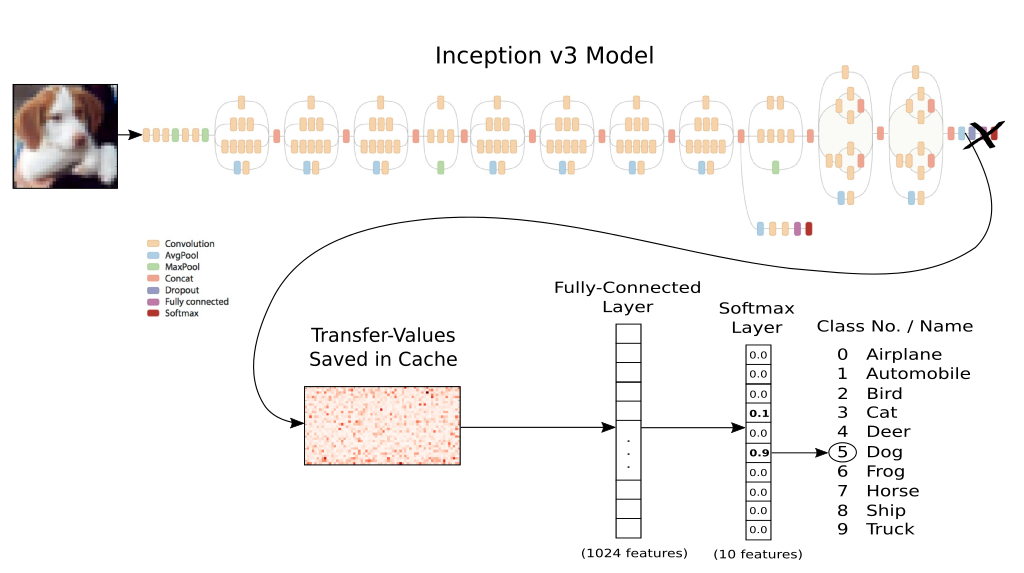

### 为什么要迁移学习？    

首先我们说一下什么是学习。  

学习的过程：数据-->信息-->概念-->知识。

迁移学习的成功意味着神经网络能够存储并提取“概念性”的东西。计算机已经能够存储和提取抽象的知识！  

让计算机直接存储感知信息比较简单，比如一幅图像，一段音频。但是，如何让计算机学会一件事情并且把“记忆”移植出来呢？  
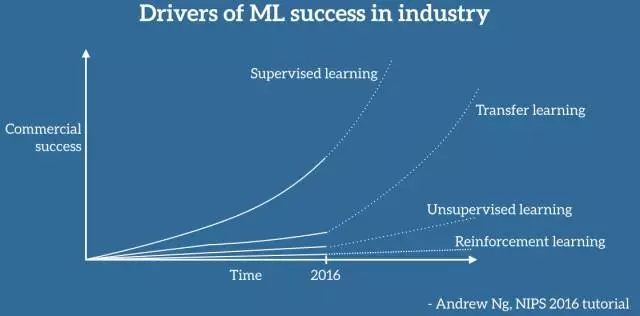

### 迁移学习常见的方法   

- 从预训练好的模型中提取出已经抽象出来的特征，将这些特征用在新的数据集上，只对神经网络最后的连接层进行训练。  

- 只固定神经网络最开始的网络层，用新的数据来训练没有固定的神经网络。由于神经网络最初的网络层提取的特征通用性很强，所以这种方式可以大大减少我们的训练成本，同时在新的数据集不够大时，提高模型的表现。  

- 使用预训练模型的全部，只对模型的参数进行微调。[Model Zoom](https://github.com/BVLC/caffe/wiki/Model-Zoo)

### 什么时候采用迁移学习？   
- 新的数据集很小，并且和预训练好的模型的训练数据很相似。这个时候宜采用特征提取的办法，只在预训练模型的最后的连接层上进行训练。  
- 新的数据集很大，并且和预训练好的模型的训练数据很相似。这个时候可以尝试对预训练模型的绝大部分网络层进行训练或者对全部网络层进行训练。  
- 新的数据集很小，并且和预训练好的模型的训练数据不同。这个时候不建议采用迁移学习。 。
- 新的数据集很大，并且和预训练好的模型的训练数据不同。这个时候宜采用对预训练模型所有的网络层进行训练。

### 迁移学习的应用    
- **从模拟中学习**
    - 对很多依靠硬件来交互的机器学习应用而言，在现实世界中收集数据、训练模型，要么很昂贵，要么很耗时间，要么只是太危险。模拟是针对这个问题的首选工具，在现实世界中它被用来实现很多先进的机器学习系统。从模拟中学习并将学到的知识应用在现实世界。   

    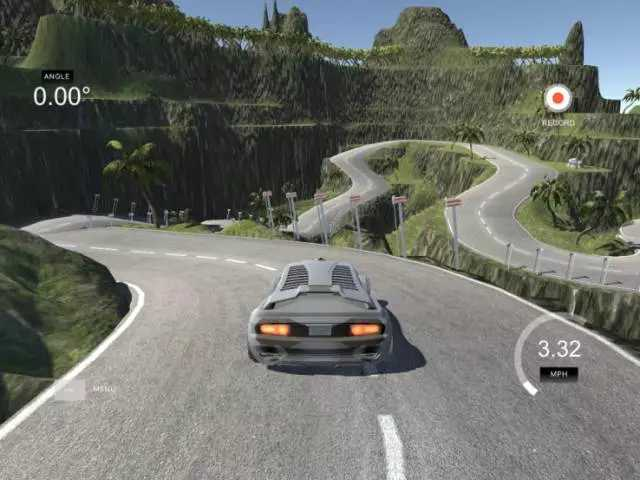  
    

### 迁移学习实例

#### 预训练模型  

**直接用预训练模型ResNet50对数据进行预测。**

In [3]:
# 导入将用到的库
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import keras
# 导入ResNet50模型
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [4]:
# 加载模型
model = ResNet50(weights='imagenet')

In [5]:
# model?

In [6]:
# 定义要加载的图片
img_path = 'parrot.jpg'
img = image.load_img(img_path, target_size=(224, 224))

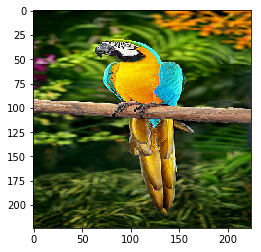

In [7]:
# 显示图片
plt.imshow(img);

In [8]:
x = image.img_to_array(img) # 将图片转换为数组

In [9]:
x.shape

(224, 224, 3)

In [10]:
x = np.expand_dims(x, axis=0) # 给输入数据增加一个轴，以满足ResNet的输入shape
x.shape

(1, 224, 224, 3)

In [11]:
x = preprocess_input(x)

In [12]:
preprocess_input?

In [13]:
preds = model.predict(x) # 对图片进行预测

In [14]:
preds

array([[  4.00268249e-07,   7.52597725e-06,   8.87214924e-08,
          4.40413714e-08,   3.56921788e-07,   3.61219662e-07,
          1.13434589e-06,   1.15181219e-05,   6.96938741e-07,
          2.54043516e-06,   3.22850610e-06,   4.57655515e-05,
          2.38740029e-07,   3.09938919e-08,   7.54662979e-05,
          3.65767046e-05,   2.28626413e-06,   7.74743210e-04,
          2.16014232e-05,   1.35454343e-06,   9.06350215e-06,
          3.66288550e-05,   3.11042550e-06,   1.23116179e-05,
          3.26230875e-05,   7.68240261e-06,   3.02429930e-06,
          1.80494123e-06,   6.00159126e-07,   7.49070423e-08,
          1.39888004e-06,   1.37646566e-05,   2.28719773e-06,
          2.53147107e-07,   1.15391595e-06,   3.03499837e-06,
          9.09612118e-06,   1.35153550e-06,   3.88132594e-06,
          1.82446956e-06,   2.68715121e-05,   1.24074870e-06,
          2.01218209e-05,   2.29616239e-06,   3.31731076e-06,
          1.93480400e-06,   3.78140180e-06,   2.88728779e-06,
        

In [15]:
print('Predicted:', decode_predictions(preds, top=5)[0])

Predicted: [('n01818515', 'macaw', 0.98696762), ('n01806143', 'peacock', 0.002742318), ('n01820546', 'lorikeet', 0.0013321717), ('n01580077', 'jay', 0.00077474321), ('n01843065', 'jacamar', 0.000618099)]


**预测剪切后的图片**

In [16]:
img_path1 = 'parrot_cropped1.jpg'
img1 = image.load_img(img_path1, target_size=(224, 224))

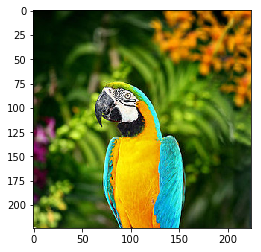

In [17]:
# 显示图片
plt.imshow(img1);

In [23]:
x1 = image.img_to_array(img1) # 将图片转换为数组

In [24]:
x1 = np.expand_dims(x1, axis=0) # 给输入数据增加一个轴，以满足ResNet的输入shape

In [25]:
x1 = preprocess_input(x1)

In [26]:
preds1 = model.predict(x1) # 对图片进行预测

In [27]:
print('Predicted:', decode_predictions(preds1, top=3)[0])

Predicted: [('n01818515', 'macaw', 0.99979371), ('n01820546', 'lorikeet', 5.6948433e-05), ('n01806143', 'peacock', 4.520416e-05)]


**对完全不同种类的图片进行预测**

In [29]:
img_path2 = 'elon_musk.jpg'
img2 = image.load_img(img_path2, target_size=(224, 224))

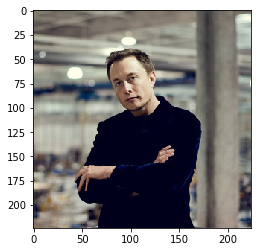

In [30]:
# 显示图片
plt.imshow(img2);

In [31]:
x2 = image.img_to_array(img2) # 将图片转换为数组

In [32]:
x2 = np.expand_dims(x2, axis=0) # 给输入数据增加一个轴，以满足ResNet的输入shape

In [33]:
x2 = preprocess_input(x2)

In [34]:
preds2 = model.predict(x2) # 对图片进行预测

In [35]:
print('Predicted:', decode_predictions(preds2, top=3)[0])

Predicted: [('n04350905', 'suit', 0.29471627), ('n02992529', 'cellular_telephone', 0.12184032), ('n03763968', 'military_uniform', 0.073869281)]


**ResNet**模型结构

In [36]:
model.layers_by_depth

{0: [<keras.layers.core.Dense at 0x129ceeac8>],
 1: [<keras.layers.core.Flatten at 0x129cee860>],
 2: [<keras.layers.pooling.AveragePooling2D at 0x129ccef28>],
 3: [<keras.layers.core.Activation at 0x129cbd860>],
 4: [<keras.layers.merge.Add at 0x129c0aa90>],
 5: [<keras.layers.normalization.BatchNormalization at 0x129beac18>],
 6: [<keras.layers.convolutional.Conv2D at 0x129bd5d30>],
 7: [<keras.layers.core.Activation at 0x129b9ff28>],
 8: [<keras.layers.normalization.BatchNormalization at 0x129b03cf8>],
 9: [<keras.layers.convolutional.Conv2D at 0x129aee7b8>],
 10: [<keras.layers.core.Activation at 0x129b17f28>],
 11: [<keras.layers.normalization.BatchNormalization at 0x129a09828>],
 12: [<keras.layers.convolutional.Conv2D at 0x129a739b0>],
 13: [<keras.layers.core.Activation at 0x1299f4c50>],
 14: [<keras.layers.merge.Add at 0x1299cfa20>],
 15: [<keras.layers.normalization.BatchNormalization at 0x1299567b8>],
 16: [<keras.layers.convolutional.Conv2D at 0x129943198>],
 17: [<keras.la

In [37]:
model.output_shape

(None, 1000)

In [28]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        input_1[0][0]                    
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 112, 112, 64)  0           bn_conv1[0][0]                   
___________________________________________________________________________________________

## 迁移学习实战

In [38]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input

In [39]:
# 加载cifar10数据集
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [40]:
print('The training samples size is {}.'.format(X_train.shape))
print('The testing samples size is {}.'.format(X_test.shape))

The training samples size is (50000, 32, 32, 3).
The testing samples size is (10000, 32, 32, 3).


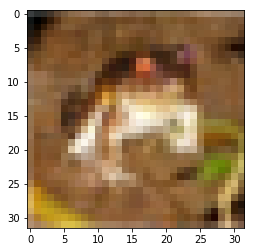

In [43]:
plt.imshow(X_train[0]);

In [51]:
y_train.shape

(50000, 1)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train_shuffle, y_train_shuffle, _, _ = train_test_split(X_train, y_train, test_size=0, random_state=42)

In [47]:
X_test_shuffle, y_test_shuffle, _, _ = train_test_split(X_test, y_test, test_size=0, random_state=42)

In [48]:
# 取原有数据集的子集
X_train_sub, y_train_sub = X_train[:5000], y_train[:5000] 
X_test_sub, y_test_sub = X_test[:1000], y_test[:1000] 

In [49]:
import os
import h5py
import scipy
from scipy import misc

In [37]:
# 将标签转换一维数组
y_train_sub = np.squeeze(y_train_sub)

In [55]:
# 加载 inceptionV3 model 并且移除最后的全连接层。
model = InceptionV3(weights='imagenet', include_top=False, input_shape=(139, 139, 3))
print('model loaded')

model loaded


In [56]:
InceptionV3?

In [57]:
# 获取训练数据在inceptionV3模型上提取到的信息。
if os.path.exists('features_train.h5'):
    print('features detected (train)')
    features = h5py.File('features_train.h5','r')['features']
else:
    print('features file not detected (train)')
    # 由于
    big_X_train_sub = np.array([scipy.misc.imresize(X_train_sub[i], (139, 139, 3)) 
                            for i in range(0, len(X_train_sub))]).astype('float32')
    inception_input_train = preprocess_input(big_X_train_sub)
    print('train data preprocessed')
    # extract, process, and save bottleneck features
    features = model.predict(inception_input_train)
    features = np.squeeze(features) 
    f = h5py.File('features_train.h5','w')    
    f['features'] = features               
    f.close()   
    
print('features file saved (train)')

features detected (train)
features file saved (train)


In [58]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [59]:
features = np.array(h5py.File('features_train.h5','r')['features'])

In [64]:
features.shape

(5000, 3, 3, 2048)

In [65]:
features_reshape = features.reshape([features.shape[0], np.prod(features.shape[1:])]).astype('float64')

In [66]:
pca = PCA(n_components=50)
transfer_values_50d = pca.fit_transform(features_reshape)

In [67]:
tsne = TSNE(n_components=2)

In [68]:
transfer_values_reduced = tsne.fit_transform(transfer_values_50d)

In [69]:
transfer_values_reduced.shape

(5000, 2)

ValueError: Invalid RGBA argument: array([[ 0.80645161,  1.        ,  0.16129032,  1.        ]])

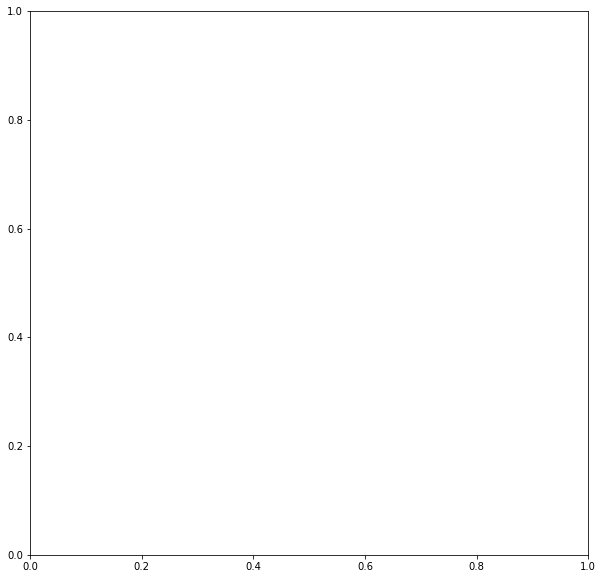

In [70]:
plt.figure(figsize=(10,10))
plt.scatter(transfer_values_reduced[:,0], transfer_values_reduced[:,1], c=plt.cm.jet(y_train_sub/10), s=10, edgecolors='none')
plt.show()

In [71]:
# 获取训练数据在inceptionV3模型上提取到的信息。
if os.path.exists('features_test.h5'):
    print('features detected (test)')
    features_test = h5py.File('features_test.h5','r')['features_test']
else:
    print('features file not detected (test)')
    # pre-process the test data
    big_X_test_sub = np.array([scipy.misc.imresize(X_test_sub[i], (139, 139, 3)) 
                            for i in range(0, len(X_test_sub))]).astype('float32')
    inception_input_test = preprocess_input(big_X_test_sub)
    print('test data preprocessing')
    # extract, process, and save bottleneck features
    features_test = model.predict(inception_input_test)
    features_test = np.squeeze(features_test) 
    f = h5py.File('features_test.h5','w')    
    f['features_test'] = features_test               
    f.close()   
    
print('features file saved (test)')

features detected (test)
features file saved (test)


In [72]:
from keras.utils import np_utils

# one-hot encode the labels
y_train_sub = np_utils.to_categorical(y_train_sub, 10)
y_test_sub = np_utils.to_categorical(y_test_sub, 10)

In [73]:

from keras.callbacks import ModelCheckpoint   
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, GlobalAveragePooling2D

model = Sequential()
model.add(Conv2D(filters=100, kernel_size=2, input_shape=features.shape[1:]))
model.add(Dropout(0.4))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='model.best.hdf5', 
                               verbose=1, save_best_only=True)
model.fit(features, y_train_sub, batch_size=50, epochs=50,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=2, shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_189 (Conv2D)          (None, 2, 2, 100)         819300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 100)         0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 100)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 820,310
Trainable params: 820,310
Non-trainable params: 0
_________________________________________________________________
Train on 4000 samples, validate on 1000 samples
Epoch 1/50
Epoch 00000: val_loss improved from inf to 5.99241, saving model to model.bes

In [74]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(features_test, y_test_sub, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 79.8000%


**课后练习**  

利用前面我们训练好的数字识别模型对新的数据集[nmnist](http://csc.lsu.edu/~saikat/n-mnist/)进行迁移学习。  

提示:  
- 我们先保存训练好的mnist模型```keras.models.save_model('model.h5')```.
- 加载预训练好的模型```keras.models.load_model('model.h5')```.
- 移除模型最后的连接层```model.layers.pop()```，通过```model.summary()```查看是否成功。
- 将新的数据集进行预处理，以符合预训练模型的输入格式。```scipy.io.loadmat('file.mat')```,读取出来的数据是字典。
- 用移除最后连接层的模型来对新的数据进行预测，将预测结果保存起来。```model.predict('input')```
- 在删除最后连接层的模型的基础上构建新的模型。
- 将前面保存起来的预测结果作为新的输入，来对新的模型进行训练。
- 评估模型。